In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
data= pd.read_csv(r'C:\Users\Fathima Hana.HANA\Downloads\diamonds_new.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


filling missing values

In [4]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [5]:
data.dtypes
     

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

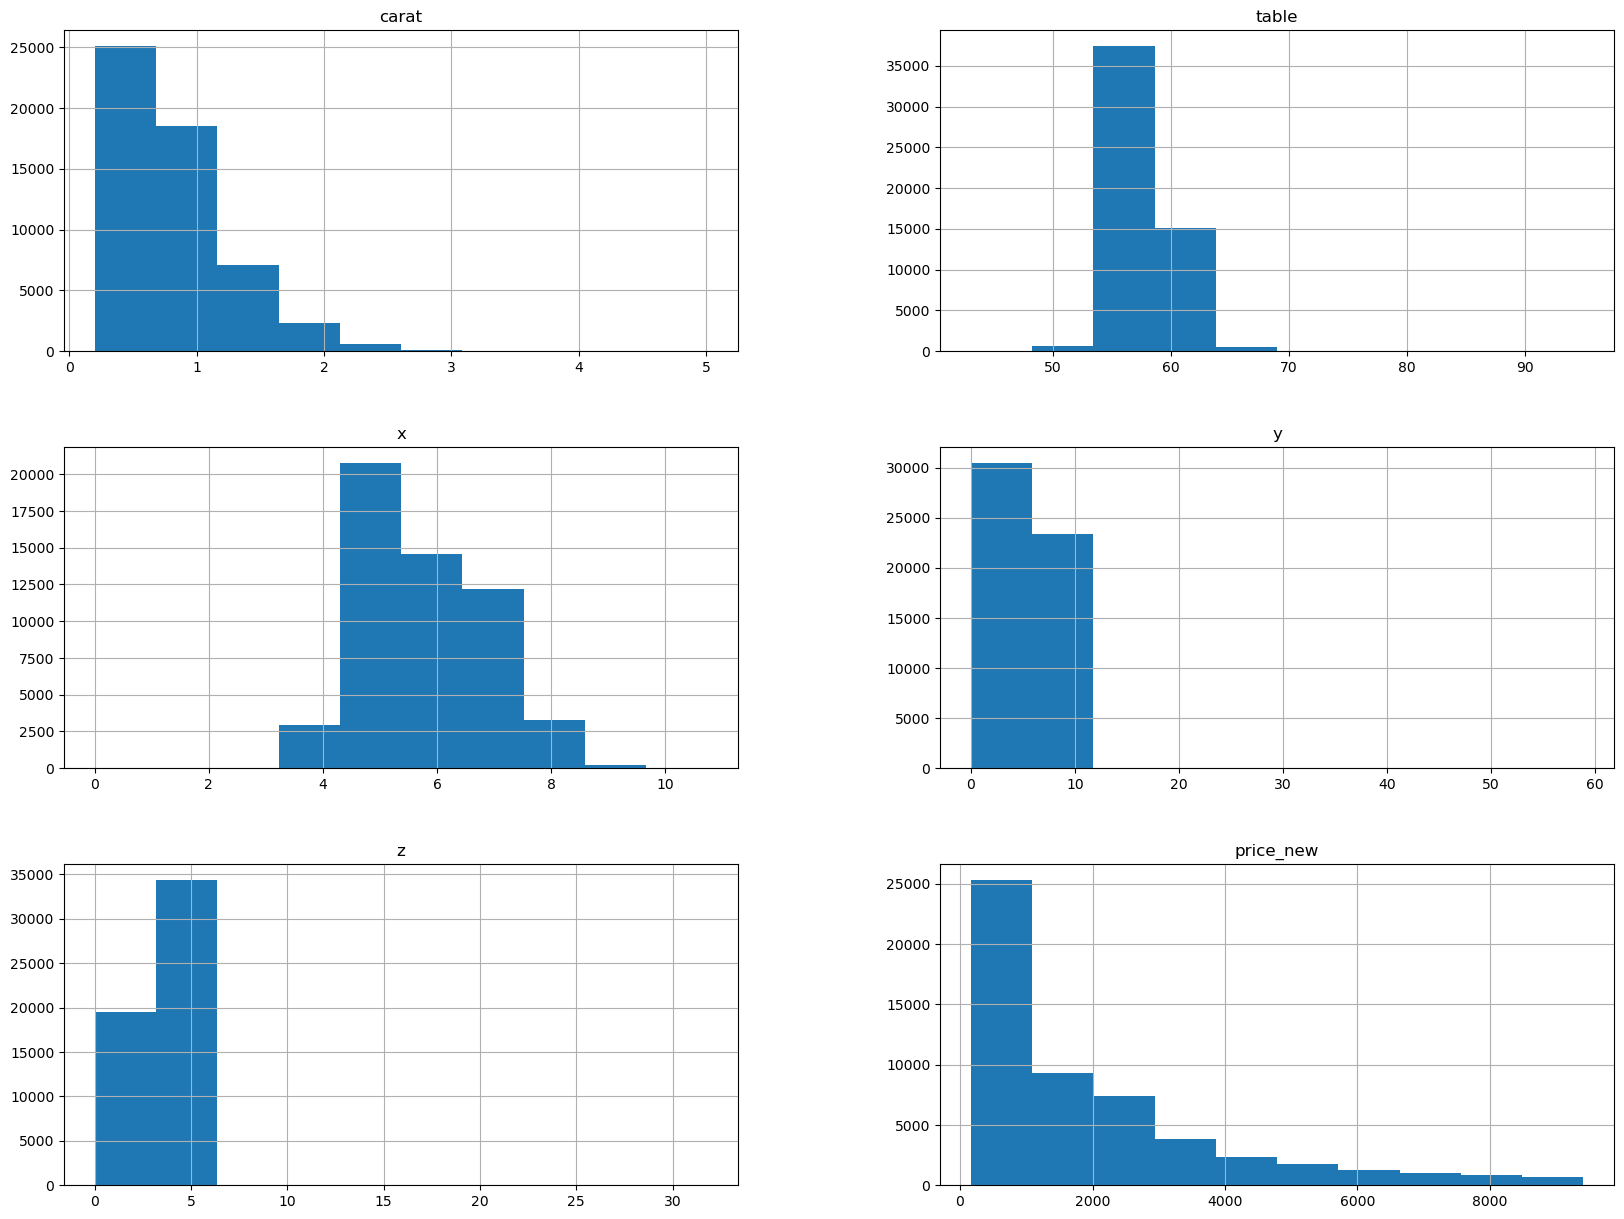

In [6]:
data.hist(figsize=(20,15))
plt.show()
     

In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [8]:
for i in ['carat','table']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
for i in ['color']:
    data[i]= data[i].fillna(data[i].mode()[0])
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

removal of outliers

In [10]:
box=data.select_dtypes(include=['float'])
box.columns

Index(['carat', 'table', 'x', 'y', 'z', 'price_new'], dtype='object')

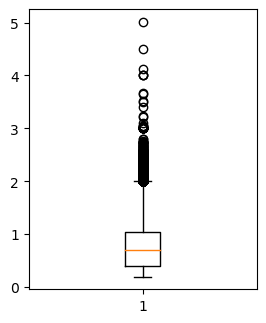

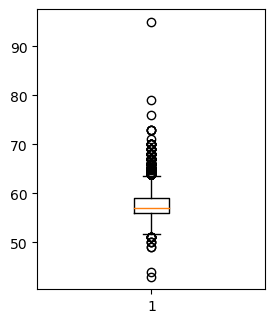

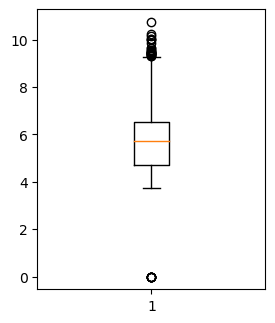

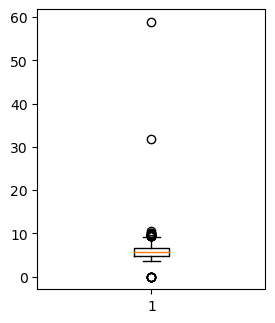

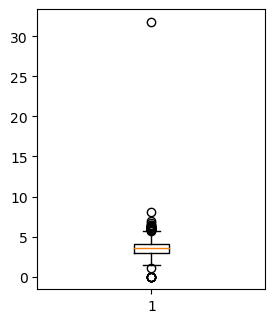

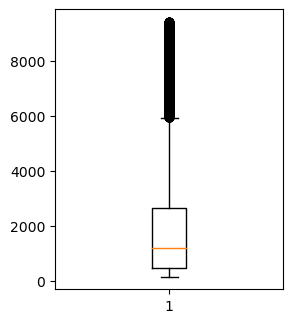

In [11]:
j=1
for i in ['carat', 'table', 'x', 'y', 'z', 'price_new']:
    plt.figure(figsize=(10,8))
    plt.subplot(2,3,j)
    plt.boxplot(box[i])
    j=j+1
plt.show()

In [12]:
data.shape

(53940, 9)

In [13]:
for i in ['carat', 'table', 'x', 'y', 'z', 'price_new']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(xup_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]

C:\Users\Fathima Hana.HANA\AppData\Local\Temp\ipykernel_25728\4113889600.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
C:\Users\Fathima Hana.HANA\AppData\Local\Temp\ipykernel_25728\4113889600.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
C:\Users\Fathima Hana.HANA\AppData\Local\Temp\ipykernel_25728\4113889600.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 

NameError: name 'xup_lim' is not defined

one hot encoding

In [15]:
data2= pd.get_dummies(data)
data2.shape
     

(53940, 26)

In [16]:
data2.head()
     

,carat,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,4.05,4.07,2.31,163.5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [17]:
data2= data2.drop(['cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'], axis=1)
     

In [18]:
y = data2['price_new']
X = data2.drop('price_new',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

#R square should be close to 1, mse should be minimum
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  571391.886251921
R squared value is:  0.8562248716188114


scaling operations

In [19]:
X.describe()
     

,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457184,5.731157,5.734526,3.539635
std,0.474011,2.234491,1.121761,1.142135,0.703869
min,0.200000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,6.540000,6.540000,4.040000
max,5.010000,95.000000,10.740000,58.900000,31.800000


In [20]:
X.columns

Index(['carat', 'table', 'x', 'y', 'z'], dtype='object')

In [21]:
X1=X
X1.head()
     

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


In [22]:
from sklearn.preprocessing import StandardScaler
std_scl= StandardScaler()

#std_scl for standard standard scaling
X1 = std_scl.fit_transform(X1)
X1 = pd.DataFrame(X1,columns=['carat', 'table', 'x', 'y', 'z'])
X.drop(['carat', 'table', 'x', 'y', 'z'],axis=1,inplace=True)
X = pd.concat([X,X1],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  571391.8862519215
R squared value is:  0.8562248716188112


In [23]:
from sklearn.preprocessing import StandardScaler
std_scl= StandardScaler()

#std_scl for standard standard scaling
X1 = std_scl.fit_transform(X1)
X1 = pd.DataFrame(X1,columns=['carat', 'table', 'x', 'y', 'z'])
X.drop(['carat', 'table', 'x', 'y', 'z'],axis=1,inplace=True)
X = pd.concat([X,X1],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  571391.8862519214
R squared value is:  0.8562248716188113


In [24]:
X.shape

(53940, 5)

In [25]:
y.shape

(53940,)

In [26]:
num_samples_y = y.shape[0]
X = X[:num_samples_y]
X.shape

(53940, 5)

In [27]:
from sklearn.preprocessing import StandardScaler
std_scl= StandardScaler()

#std_scl for standard standard scaling
X1 = std_scl.fit_transform(X1)
X1 = pd.DataFrame(X1,columns=['carat', 'table', 'x', 'y', 'z'])
X.drop(['carat', 'table', 'x', 'y', 'z'],axis=1,inplace=True)
X = pd.concat([X,X1],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  571391.8862519214
R squared value is:  0.8562248716188113
